In [54]:
import spacy
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [55]:
nlp = spacy.load('en_core_web_md')

In [56]:
def cos_sim(a,b):
    return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [57]:

words = ['badminton', 'soccer','football','tennis','basketball','volleyball','golf','bowling']

embs =[]
for word in words:
    doc = nlp(word)
    
    embs.append(doc[0].vector)

df = pd.DataFrame(embs)
df['y'] = 1

df

words_n = ['rice', 'food','ramen','sushi','schnitzel','bread','steak','soup','curry','ham']
embs_n =[]
for word in words_n:
    doc = nlp(word)
    
    embs_n.append(doc[0].vector)

df_n = pd.DataFrame(embs_n)
df_n['y'] = 0

df_n
df = pd.concat([df,df_n])
df.index = words + words_n

logreg = LogisticRegression()

logreg.fit(df.drop('y',axis=1), df['y'])


LogisticRegression()

In [67]:
df

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,y
badminton,0.97720,0.414030,0.629600,-0.448700,0.253520,-0.256000,0.310630,-0.084068,0.203640,1.973700,...,-0.760360,0.064370,-0.598090,0.422380,-0.007634,0.128270,-1.05660,0.70404,0.231060,1
soccer,0.39708,0.308080,0.054974,-0.094401,0.511960,-0.059389,0.417690,0.550120,-0.030147,2.293500,...,-0.417190,-0.210820,-0.397080,0.133120,-0.296540,0.136350,-0.81888,0.32510,0.334830,1
football,0.43758,0.480540,-0.006623,-0.174480,0.440430,-0.314420,0.533970,0.467290,0.101590,2.724400,...,-0.413260,-0.472500,-0.335350,0.168760,-0.092063,-0.078021,-0.49248,0.51232,-0.189740,1
tennis,0.97720,0.414030,0.629600,-0.448700,0.253520,-0.256000,0.310630,-0.084068,0.203640,1.973700,...,-0.760360,0.064370,-0.598090,0.422380,-0.007634,0.128270,-1.05660,0.70404,0.231060,1
basketball,0.53475,0.460060,0.642910,-0.515500,0.884410,-0.069407,0.283630,0.191470,0.322910,2.566500,...,-0.550070,-0.238840,-0.461090,0.114490,-0.284370,-0.417320,-0.56051,0.43105,-0.059607,1
volleyball,0.53475,0.460060,0.642910,-0.515500,0.884410,-0.069407,0.283630,0.191470,0.322910,2.566500,...,-0.550070,-0.238840,-0.461090,0.114490,-0.284370,-0.417320,-0.56051,0.43105,-0.059607,1
golf,0.67065,0.791870,0.694910,-1.235200,0.474850,-0.379910,0.269880,-0.201740,0.308130,2.159700,...,-0.421700,-0.208510,-0.763800,0.036441,-0.248160,0.122180,-0.31578,0.38895,0.246490,1
bowling,0.46490,0.357320,0.667470,-0.638100,0.493200,-0.154590,0.073241,0.559300,0.779940,1.565800,...,-0.520370,-0.270140,0.354750,0.062673,0.097250,0.064450,-0.65026,0.26939,0.159580,1
rice,-0.73745,-0.115380,0.468990,-0.409600,-0.202900,0.645760,-0.359340,-0.519810,-0.281940,0.837480,...,0.668150,-0.296520,-0.400770,-0.474340,0.265000,-0.263040,-0.27066,0.07395,0.084599,0
food,-0.43512,0.028351,0.491100,-0.351680,-0.115780,1.036900,-0.097550,0.086624,-0.178900,2.455500,...,0.324890,-0.077239,0.078217,-0.287370,0.302530,0.219720,-0.47151,0.43010,0.365730,0


In [66]:
logreg = LogisticRegression()
X = df.drop('y', axis=1)
df.drop('y', axis=1)
y = df['y']

logreg.fit(X, y)

LogisticRegression()

In [70]:
logreg.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [58]:
w = 'food'
d = nlp(w)
predword = d.vector.reshape(1,-1) 
print(logreg.predict_proba(predword))
'sport' if logreg.predict(predword)[0] else 'food'

[[0.96963595 0.03036405]]


'food'

In [61]:
df['y']

badminton     1
soccer        1
football      1
tennis        1
basketball    1
volleyball    1
golf          1
bowling       1
rice          0
food          0
ramen         0
sushi         0
schnitzel     0
bread         0
steak         0
soup          0
curry         0
ham           0
Name: y, dtype: int64

In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [24]:
scale = StandardScaler()

df_scale = scale.fit_transform(df.drop('y', axis=1))

pca = PCA()

pca_fitted = pca.fit_transform(df_scale)
labels = ["PC"+str(i+1) for i in range(0,18)]
pca_df = pd.DataFrame(pca_fitted, index = df.index, columns=labels)


Prediction: sport


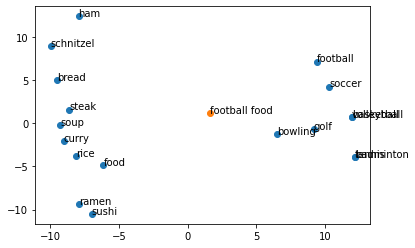

In [52]:
# PLOT WORD PCA
pca_df = pd.DataFrame(pca_fitted, index = df.index, columns=labels)

w = 'foodfootball'
d = nlp(w)
d_pca = pca.transform(scale.transform(d.vector.reshape(1,-1)))
plt.scatter(pca_df['PC1'], pca_df['PC2'])



for sample in pca_df.index:
    plt.annotate(sample, (pca_df['PC1'].loc[sample],pca_df['PC2'].loc[sample]))
    
plt.scatter(d_pca[0][0], d_pca[0][1])
plt.annotate(w, (d_pca[0][0], d_pca[0][1]))

predword = d.vector.reshape(1,-1) 
print(f"Prediction: {'sport' if logreg.predict(predword)[0] else 'food'}")